In [1]:
import pandas as pd
import numpy

### 2개의 축을 갖는 그래프 작성
- 남북한 발전량 데이터 셋을 사용
- 막대그래프는 북한의 발전량을 표시
- 선그래프는 북한 발전량의 전년 대비 증감률을 백분율로 나타낸다

In [7]:
df = pd.read_excel("../Data/남북한발전전력량.xlsx")
df

,전력량 (억㎾h),발전 전력별,1990,1991,1992,1993,1994,1995,1996,1997,...,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016
0,남한,합계,1077,1186,1310,1444,1650,1847,2055,2244,...,4031,4224,4336,4747,4969,5096,5171,5220,5281,5404
1,NaN,수력,64,51,49,60,41,55,52,54,...,50,56,56,65,78,77,84,78,58,66
2,NaN,화력,484,573,696,803,1022,1122,1264,1420,...,2551,2658,2802,3196,3343,3430,3581,3427,3402,3523
3,NaN,원자력,529,563,565,581,587,670,739,771,...,1429,1510,1478,1486,1547,1503,1388,1564,1648,1620
4,NaN,신재생,-,-,-,-,-,-,-,-,...,-,-,-,-,-,86,118,151,173,195
5,북한,합계,277,263,247,221,231,230,213,193,...,236,255,235,237,211,215,221,216,190,239
6,NaN,수력,156,150,142,133,138,142,125,107,...,133,141,125,134,132,135,139,130,100,128
7,NaN,화력,121,113,105,88,93,88,88,86,...,103,114,110,103,79,80,82,86,90,111
8,NaN,원자력,-,-,-,-,-,-,-,-,...,-,-,-,-,-,-,-,-,-,-


In [15]:
# 북한 전력량만 선택
df = df.loc[5:9]
df

,전력량 (억㎾h),발전 전력별,1990,1991,1992,1993,1994,1995,1996,1997,...,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016
5,북한,합계,277,263,247,221,231,230,213,193,...,236,255,235,237,211,215,221,216,190,239
6,NaN,수력,156,150,142,133,138,142,125,107,...,133,141,125,134,132,135,139,130,100,128
7,NaN,화력,121,113,105,88,93,88,88,86,...,103,114,110,103,79,80,82,86,90,111
8,NaN,원자력,-,-,-,-,-,-,-,-,...,-,-,-,-,-,-,-,-,-,-


In [18]:
# 전력량 칼럼 삭제
df.drop("전력량 (억㎾h)", axis=1, inplace=True)

/Users/tj/opt/anaconda3/lib/python3.9/site-packages/pandas/core/frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [19]:
df

,발전 전력별,1990,1991,1992,1993,1994,1995,1996,1997,1998,...,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016
5,합계,277,263,247,221,231,230,213,193,170,...,236,255,235,237,211,215,221,216,190,239
6,수력,156,150,142,133,138,142,125,107,102,...,133,141,125,134,132,135,139,130,100,128
7,화력,121,113,105,88,93,88,88,86,68,...,103,114,110,103,79,80,82,86,90,111
8,원자력,-,-,-,-,-,-,-,-,-,...,-,-,-,-,-,-,-,-,-,-


In [21]:
df.set_index(['발전 전력별'], inplace=True)

In [22]:
df = df.T
df.head()

발전 전력별,합계,수력,화력,원자력
1990,277,156,121,-
1991,263,150,113,-
1992,247,142,105,-
1993,221,133,88,-
1994,231,138,93,-


In [23]:
# 합계 칼럼을 총발전량으로 변경
df = df.rename(columns={'합계':'총발전량'})
df.head()

발전 전력별,총발전량,수력,화력,원자력
1990,277,156,121,-
1991,263,150,113,-
1992,247,142,105,-
1993,221,133,88,-
1994,231,138,93,-


In [24]:
# 증감율(변동율) 계산
# 총발전량 - 1년이라는 칼럼 생성
# shift(1) 한 행 전 데이터 가져오기

df['총발전량 - 1년'] = df['총발전량'].shift(1)
df.head()

발전 전력별,총발전량,수력,화력,원자력,총발전량 - 1년
1990,277,156,121,-,NaN
1991,263,150,113,-,277
1992,247,142,105,-,263
1993,221,133,88,-,247
1994,231,138,93,-,221


In [25]:
# 증감률 칼럼 만들기
df['증감율'] = ((df['총발전량']/ df['총발전량 - 1년']) -1) * 100
df.head()

발전 전력별,총발전량,수력,화력,원자력,총발전량 - 1년,증감율
1990,277,156,121,-,NaN,NaN
1991,263,150,113,-,277,-5.054152
1992,247,142,105,-,263,-6.08365
1993,221,133,88,-,247,-10.526316
1994,231,138,93,-,221,4.524887


In [27]:
import matplotlib.pyplot as plt
import warnings

warnings.filterwarnings('ignore')

In [28]:
# 한글 폰트 문제 해결 
# matplotlib은 한글 폰트를 지원하지 않음
# os정보
import platform

# font_manager : 폰트 관리 모듈
# rc : 폰트 변경 모듈
from matplotlib import font_manager, rc
# unicode 설정
plt.rcParams['axes.unicode_minus'] = False

if platform.system() == 'Darwin':
    rc('font', family='AppleGothic') # os가 macos
elif platform.system() == 'Windows':
    path = 'c:/Windows/Fonts/malgun.ttf' # os가 windows
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font', family=font_name)
else:
    print("Unknown System")

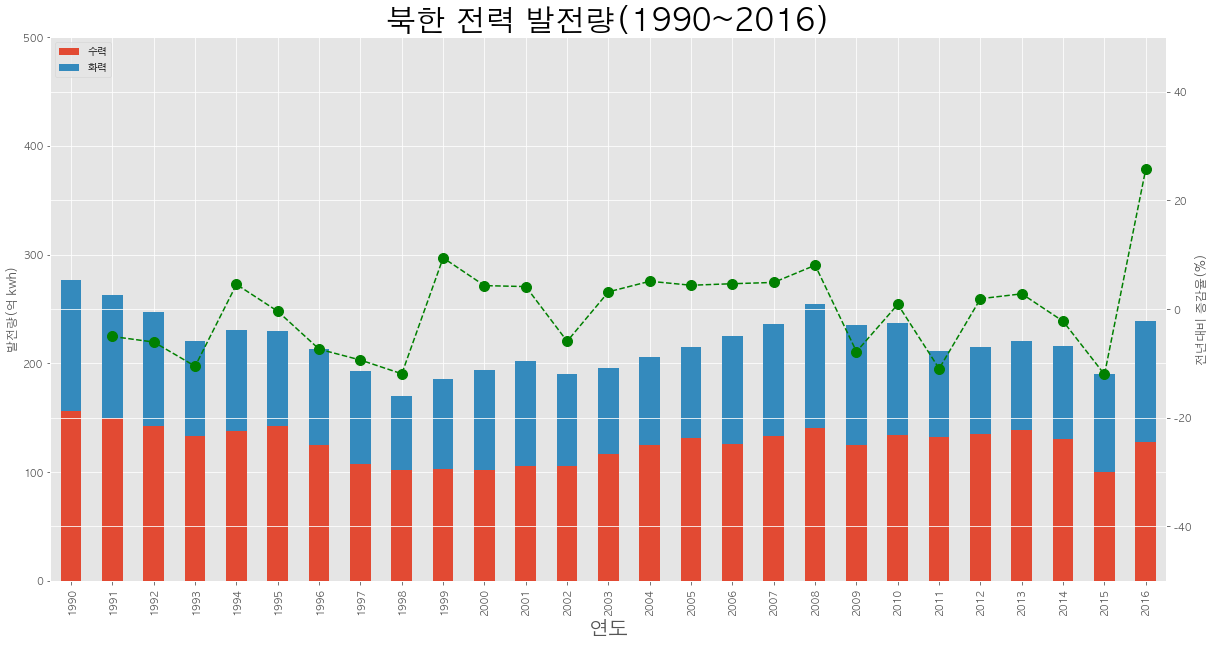

In [43]:
# 2출 그래프 그리기

plt.style.use('ggplot')

ax1 = df[['수력','화력']].plot(kind='bar', figsize=(20,10), stacked=True)
# x축 같게 만들어주기 : 
ax2 = ax1.twinx()
ax2.plot(df.index, df.증감율, ls="--", marker= "o", markersize=10, color="green")

ax1.set_ylim(0,500)
ax2.set_ylim(-50,50)

ax1.set_xlabel('연도', size=20)
ax1.set_ylabel('발전량(억 kwh)')
ax2.set_ylabel('전년대비 증감율(%)')

plt.title('북한 전력 발전량(1990~2016)', size=30)
ax1.legend(loc='upper left')
plt.show()

In [ ]:
# Style 서식 지정 
plt.style.use('classic')

In [ ]:
df = pd.read_csv("../Data/auto-mpg.csv",header=None)
df.head()

,0,1,2,3,4,5,6,7,8
0,18.0,8,307.0,130.0,3504.0,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693.0,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150.0,3436.0,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150.0,3433.0,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140.0,3449.0,10.5,70,1,ford torino


In [ ]:
df.columns = ['mpg','cylinders','displacement','horsepower','weight',
              'acceleration','model year','origin','name']

df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,name
0,18.0,8,307.0,130.0,3504.0,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693.0,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150.0,3436.0,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150.0,3433.0,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140.0,3449.0,10.5,70,1,ford torino


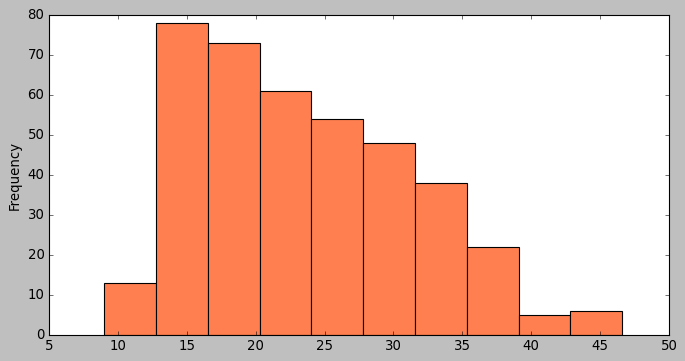

In [ ]:
# 연비(mpg) 열에 대한 히스토그램 그리기

df['mpg'].plot(

    kind='hist',
    bins = 10,
    color ='coral',
    figsize=(10,5)
)

plt.show()

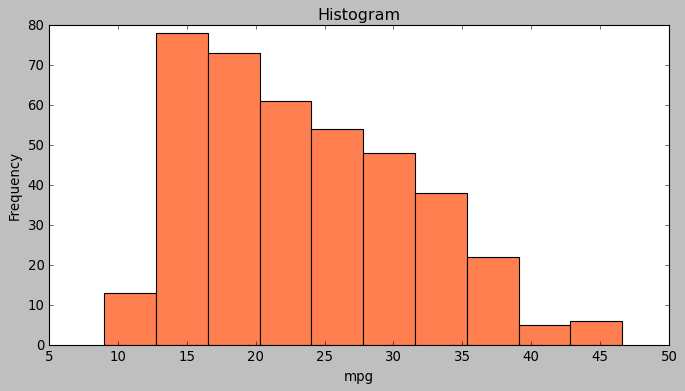

In [ ]:
# 연비(mpg) 열에 대한 히스토그램 그리기

df['mpg'].plot(

    kind='hist',
    bins = 10,
    color ='coral',
    figsize=(10,5)
)
#그래프 그리기
plt.title('Histogram')
plt.xlabel('mpg')
plt.show()

> 자동차의 연비값은 대분 좌측편향이 되어 연비가 낮은 구간에 집중되는 경향을 보인다.

---
### 산점도 (Scatter plot)
- 서로 다른 두 변수 사이의 관계를 나타낸다.


In [ ]:
plt.style.use('default')

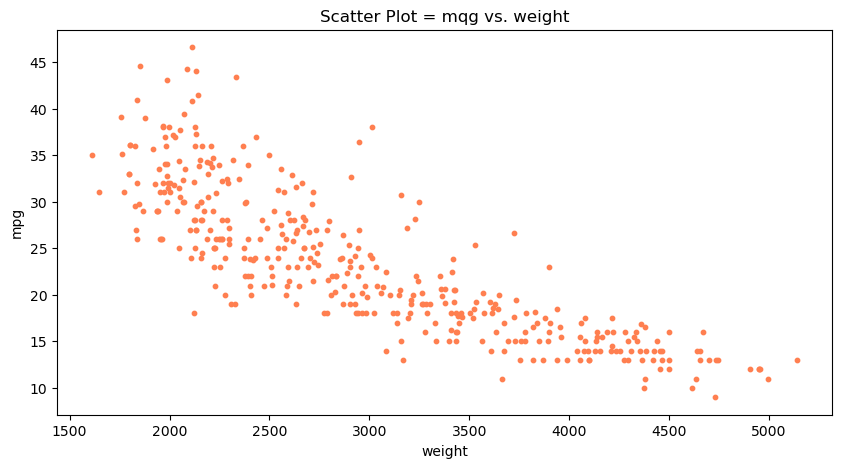

In [ ]:
# 연비(mpg)와 차종(weight) 열에 대한 산점도 그리기
df.plot(
    kind = 'scatter',
    x = 'weight',
    y = 'mpg',
    c = 'coral',
    s = 10,     # dot size
    figsize=(10, 5),
)
plt.title('Scatter Plot = mqg vs. weight')
plt.show()

> 자동차의 무게가 높을수록 연비는 낮아지는 역상관을 표현하고 있다. 

In [ ]:
# Cylinder 개수의 상대적 비율을 계산하여시리즈 생성
cylinder_size = df.cylinders / df.cylinders.max() * 300 # <- Hyper Parameter
print(cylinder_size)

0      300.0
1      300.0
2      300.0
3      300.0
4      300.0
       ...  
393    150.0
394    150.0
395    150.0
396    150.0
397    150.0
Name: cylinders, Length: 398, dtype: float64


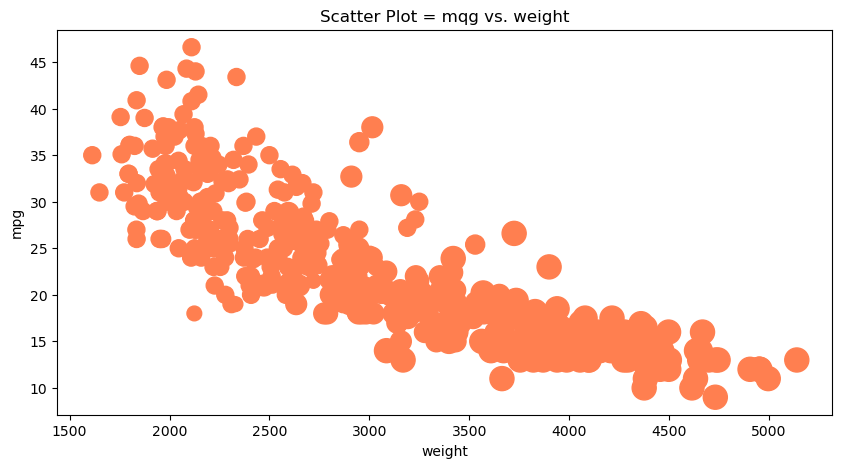

In [ ]:
# 연비(mpg)와 차종(weight) 열에 대한 산점도 그리기
df.plot(
    kind = 'scatter',
    x = 'weight',
    y = 'mpg',
    c = 'coral',
    s = cylinder_size,     # dot size
    figsize=(10, 5),
)
plt.title('Scatter Plot = mqg vs. weight')
plt.show()

---
### 버블(Bubble) 차트


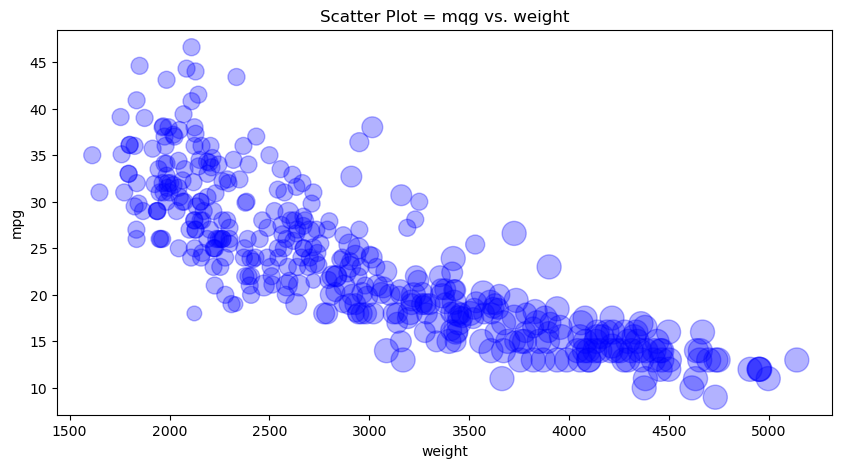

In [ ]:
# 연비(mpg)와 차종(weight) 열에 대한 산점도 그리기
df.plot(
    kind = 'scatter',
    x = 'weight',
    y = 'mpg',
    c = 'blue',
    s = cylinder_size,     # dot size
    alpha = 0.3,
    figsize=(10, 5),
)
plt.title('Scatter Plot = mqg vs. weight')
plt.show()

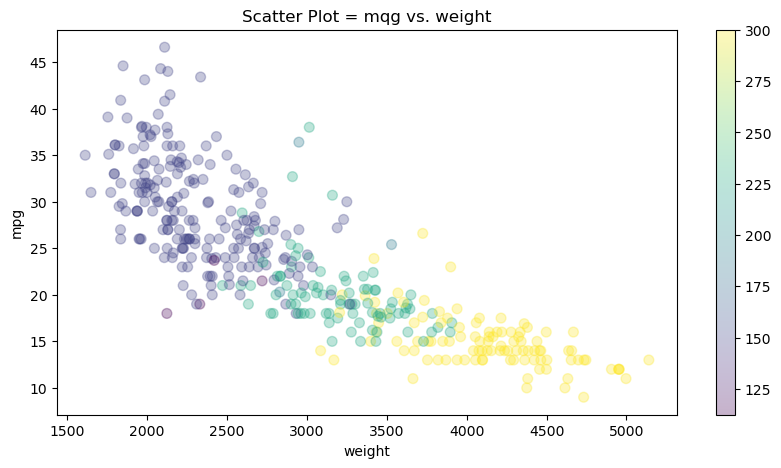

In [ ]:
# 연비(mpg)와 차종(weight) 열에 대한 산점도 그리기
df.plot(
    kind = 'scatter',
    x = 'weight',
    y = 'mpg',
    c = cylinder_size,
    s = 50,     # dot size
    alpha = 0.3,
    figsize=(10, 5),
    marker= "o",
    cmap = 'viridis'
)
plt.title('Scatter Plot = mqg vs. weight')
plt.show()

---
### 파이차트(pie chart)
- 원을 파이처럼 나누어서 표현
- 조각의 크기는 해당변수에 속하는 데이터 값의 크기에 비례(%)

#### 자동차의 국가별 데이터 갯수를 파이차트로 표현

In [ ]:
plt.style.use('default')

In [ ]:
df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,name
0,18.0,8,307.0,130.0,3504.0,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693.0,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150.0,3436.0,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150.0,3433.0,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140.0,3449.0,10.5,70,1,ford torino


In [ ]:
# 국가별 Count를 계산
df['count'] = 1
df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,name,count
0,18.0,8,307.0,130.0,3504.0,12.0,70,1,chevrolet chevelle malibu,1
1,15.0,8,350.0,165.0,3693.0,11.5,70,1,buick skylark 320,1
2,18.0,8,318.0,150.0,3436.0,11.0,70,1,plymouth satellite,1
3,16.0,8,304.0,150.0,3433.0,12.0,70,1,amc rebel sst,1
4,17.0,8,302.0,140.0,3449.0,10.5,70,1,ford torino,1


In [ ]:
# origin 열을 기준으로 그룹화, 합계 연산 

df_origin = df.groupby('origin').sum()
df_origin.head()

,mpg,cylinders,displacement,weight,acceleration,model year,count
origin,,,,,,,
1,5000.8,1556,61229.5,837121.0,3743.4,18827,249
2,1952.4,291,7640.0,169631.0,1175.1,5307,70
3,2405.6,324,8114.0,175477.0,1277.6,6118,79


In [ ]:
# index 값을 변경
df_origin.index = ['USA', 'EU', 'JAPAN']
df_origin

,mpg,cylinders,displacement,weight,acceleration,model year,count
USA,5000.8,1556,61229.5,837121.0,3743.4,18827,249
EU,1952.4,291,7640.0,169631.0,1175.1,5307,70
JAPAN,2405.6,324,8114.0,175477.0,1277.6,6118,79


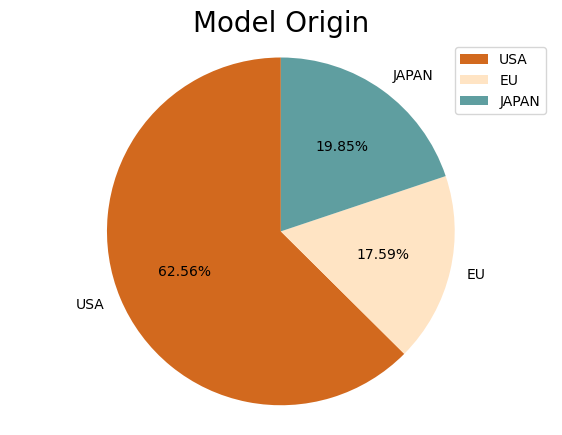

In [ ]:
# 파이차트 그리기
df_origin['count'].plot(
    kind='pie',
    figsize = (7, 5),
    autopct = '%.2f%%',  # %를 나타내기 위해 하나의 이스케이프 문자 형태로 %%로 입력
    startangle = 90,
    colors = ['chocolate', 'bisque', 'cadetblue']
)

plt.title("Model Origin", size = 20)
plt.axis('equal')
plt.legend(labels=df_origin.index, loc = 'best')
plt.ylabel('')
plt.show()

---
### 박스플롯(boxplot)
- 범주형 데이터의 분포를 파악


##### 제조 국가별 연비 분포 박스플롯

In [ ]:
plt.style.use('seaborn-poster')

In [ ]:
# 한글 폰트 문제 해결 
# matplotlib은 한글 폰트를 지원하지 않음
# os정보
import platform

# font_manager : 폰트 관리 모듈
# rc : 폰트 변경 모듈
from matplotlib import font_manager, rc
# unicode 설정
plt.rcParams['axes.unicode_minus'] = False

if platform.system() == 'Darwin':
    rc('font', family='AppleGothic') # os가 macos
elif platform.system() == 'Windows':
    path = 'c:/Windows/Fonts/malgun.ttf' # os가 windows
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font', family=font_name)
else:
    print("Unknown System")

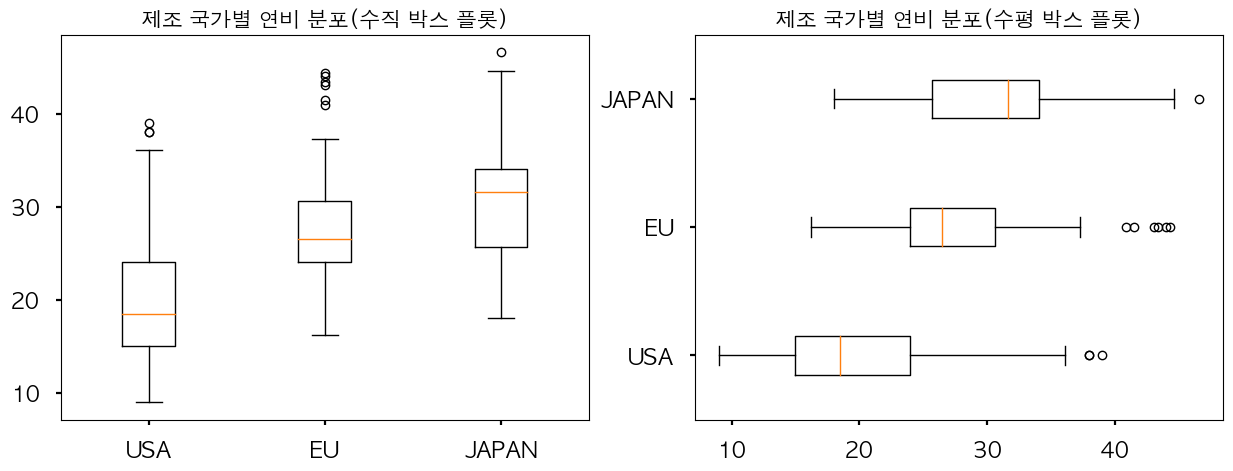

In [ ]:
# 그래프 객체 생성
fig = plt.figure(figsize=(15, 5))
ax1 = fig.add_subplot(1, 2, 1)
ax2 = fig.add_subplot(1, 2, 2)

# 수직 박스 플롯
ax1.boxplot(
    x = [
        df[df['origin'] == 1]['mpg'],
        df[df['origin'] == 2]['mpg'],
        df[df['origin'] == 3]['mpg'],
    ],
    labels = df_origin.index
)
ax2.boxplot(
    x = [
        df[df['origin'] == 1]['mpg'],
        df[df['origin'] == 2]['mpg'],
        df[df['origin'] == 3]['mpg'],
    ],
    labels = df_origin.index,
    vert = False
)

ax1.set_title('제조 국가별 연비 분포(수직 박스 플롯)', size=15)
ax2.set_title('제조 국가별 연비 분포(수평 박스 플롯)', size=15)
plt.show()

In [ ]:
df[df['origin'] == 1]['mpg']

0      18.0
1      15.0
2      18.0
3      16.0
4      17.0
       ... 
392    27.0
393    27.0
395    32.0
396    28.0
397    31.0
Name: mpg, Length: 249, dtype: float64